In [1]:
file = r'D:\Naresh\GUVI\Projects\CarDheko\data\processed_data\model_data.xlsx'

import pandas as pd

data = pd.read_excel(file)

In [6]:
print(data['year_of_registration'][490])

1995


In [29]:
data.loc[data['year_of_registration'] == 0, 'year_of_registration'] = data['model_year']
data.loc[data['number_of_owners'] == 0, 'number_of_owners'] = 1

data.loc[data['km_driven'] == 0, 'km_driven'] = int(data['km_driven'].mean())
data.loc[data['km_driven'] < 1000, 'km_driven'] = 1000


In [30]:
output_path = "D:/Naresh/GUVI/Projects/CarDheko/data/processed_data/"
with pd.ExcelWriter(output_path+'model_data_featured.xlsx') as writer:
        print("writing data in excel...")
        data.to_excel(writer, sheet_name='raw_processed',index=False)

writing data in excel...


In [19]:
import numpy as np
print(int(data['km_driven'].mean()))
print(np.log1p(data['km_driven'].replace(0, 1)))

58974
0       11.695255
1       10.395344
2        9.388487
3        9.786673
4       11.002117
          ...    
8364     9.210440
8365    11.695255
8366    10.819798
8367    10.596660
8368    11.695255
Name: km_driven, Length: 8369, dtype: float64


In [27]:
d = data.groupby(['model', 'model_year'])['km_driven'].transform(
    lambda x: x.replace(0, x.mean())
)

In [16]:
df=data

In [10]:
# Summary statistics
print(df['km_driven'].describe())

# Check for unique values and zero counts
print("Number of zero km_driven:", (df['km_driven'] < 1000).sum())
print("Unique values:", df['km_driven'].nunique())

count    8.369000e+03
mean     5.897430e+04
std      7.406100e+04
min      0.000000e+00
25%      3.000000e+04
50%      5.369200e+04
75%      8.000000e+04
max      5.500000e+06
Name: km_driven, dtype: float64
Number of zero km_driven: 16
Unique values: 4090


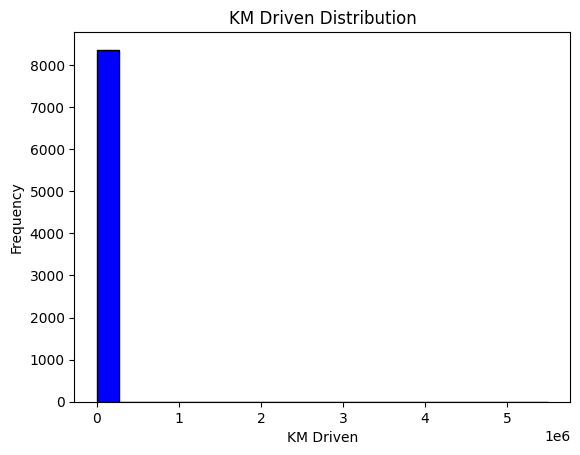

In [11]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['km_driven'], bins=20, color='blue', edgecolor='black')
plt.title('KM Driven Distribution')
plt.xlabel('KM Driven')
plt.ylabel('Frequency')
plt.show()

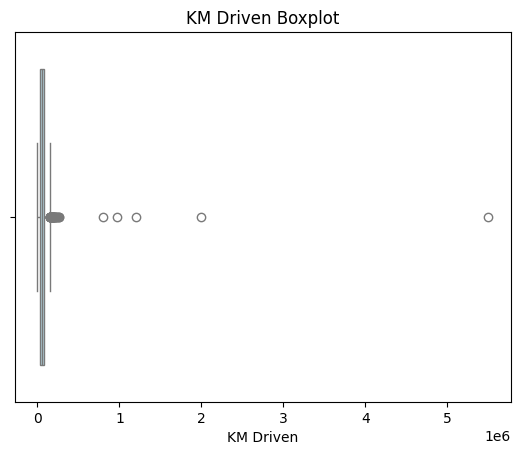

In [12]:
import seaborn as sns

# Plot boxplot
sns.boxplot(x=df['km_driven'], color='lightblue')
plt.title('KM Driven Boxplot')
plt.xlabel('KM Driven')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4492\1571312336.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['km_driven'], shade=True, color='green')


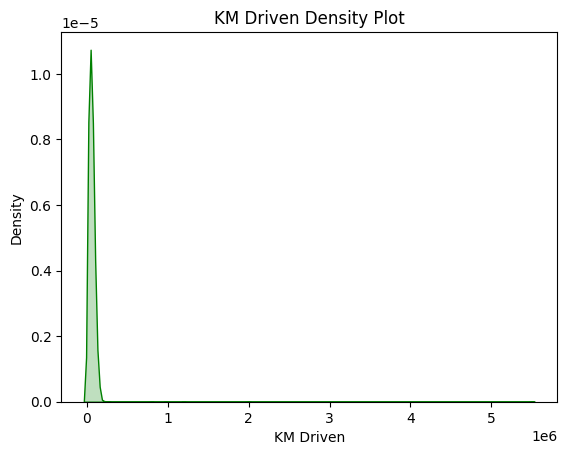

In [13]:
sns.kdeplot(df['km_driven'], shade=True, color='green')
plt.title('KM Driven Density Plot')
plt.xlabel('KM Driven')
plt.ylabel('Density')
plt.show()

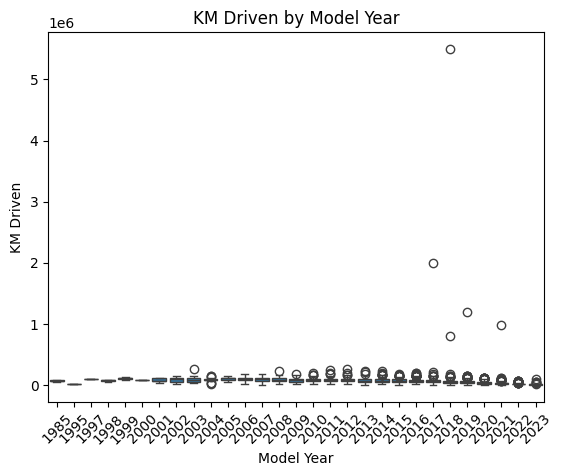

In [14]:
# Boxplot by model_year
sns.boxplot(x='model_year', y='km_driven', data=df)
plt.title('KM Driven by Model Year')
plt.xlabel('Model Year')
plt.ylabel('KM Driven')
plt.xticks(rotation=45)
plt.show()